In [1]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
from sklearn import metrics

### **Loading** **dataset**

In [16]:
columns = ['Sepal length', 'Sepal width','Petal length', 'Petal width', 'Species']
#Load the data
df =pd.read_csv('/content/IRIS.csv', names=columns)
df.head(152)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### **Visualization of dataset**

In [4]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width,Species
count,151,151,151,151,151
unique,36,24,44,23,4
top,5,3,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


In [ ]:
df.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64

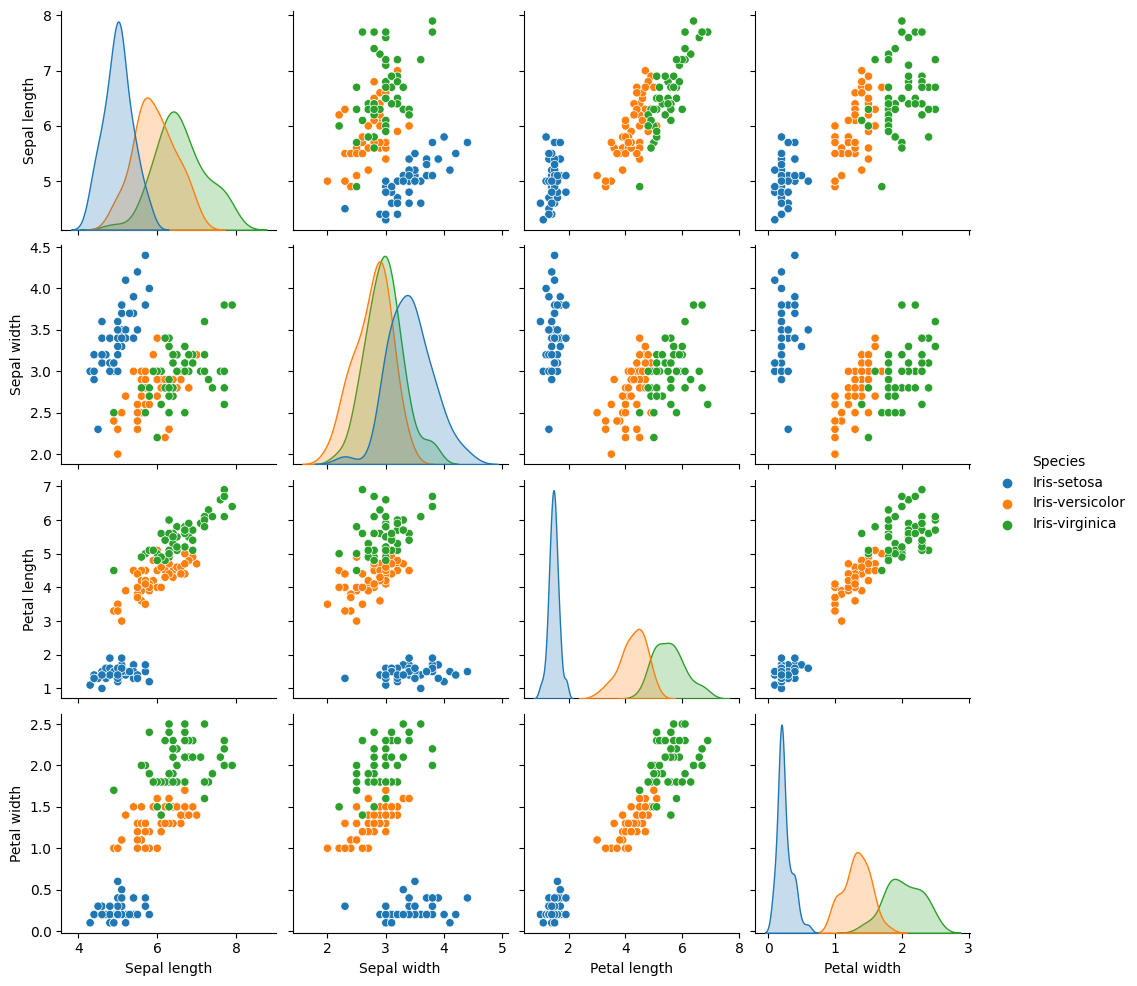

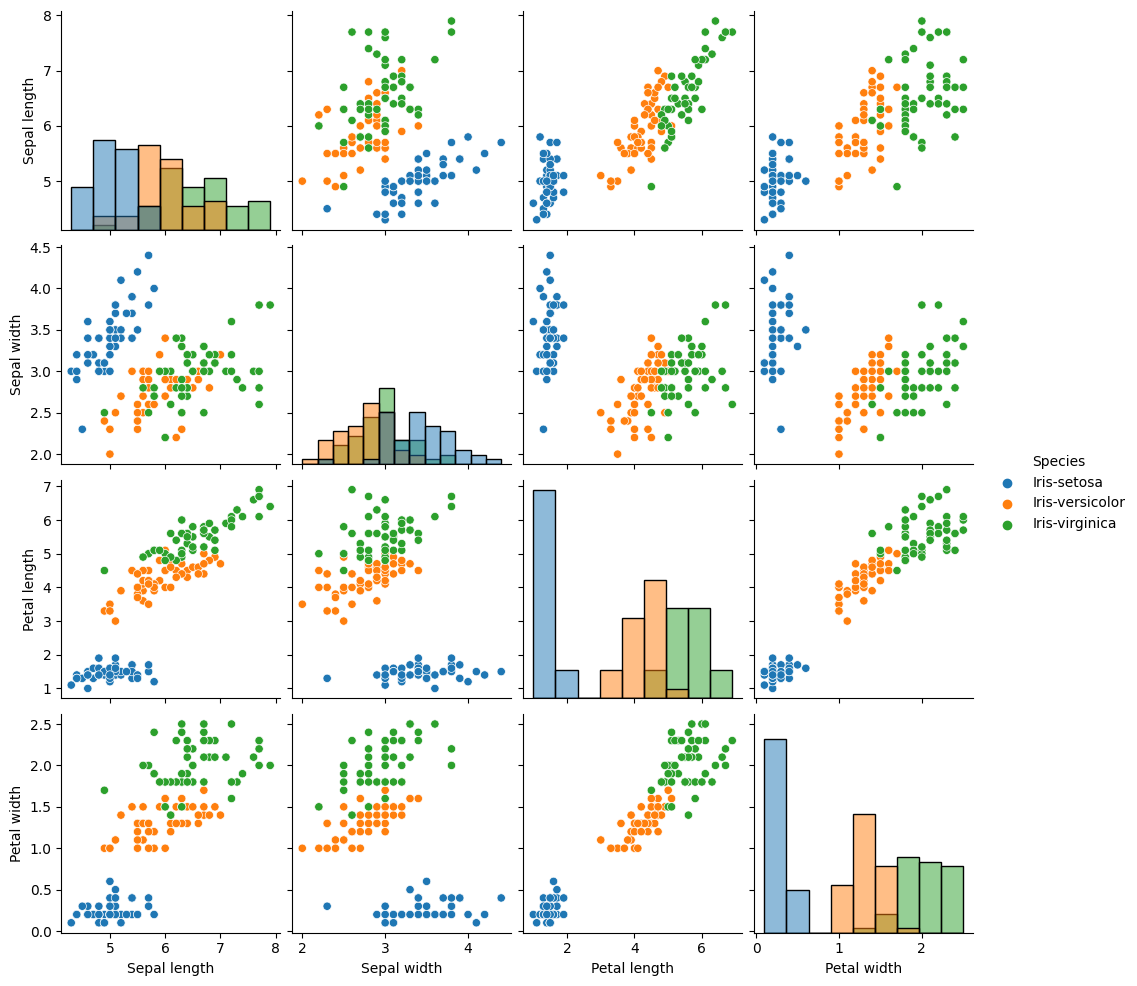

In [22]:
#Visualize the whole dataset
#error due to no value in 1st row i.e. only column names
#error solved
sns.pairplot(df, hue='Species')
sns.pairplot(df, hue='Species', kind = 'scatter' , diag_kind='hist')

### **Seperating input columns and output column**

In [ ]:
#Separate features and target
data = df.values

X = data[:,0:4]
Y = data[:,4]
print(Y)

### **Splitting the data into training and testing**

In [19]:
#Split the data to train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_test)

[[4.4 2.9 1.4 0.2]
 [7.7 3.0 6.1 2.3]
 [6.8 2.8 4.8 1.4]
 [6.5 3.2 5.1 2.0]
 [5.6 3.0 4.5 1.5]
 [5.8 2.7 4.1 1.0]
 [5.2 3.4 1.4 0.2]
 [5.6 2.5 3.9 1.1]
 [6.4 2.9 4.3 1.3]
 [7.2 3.2 6.0 1.8]
 [6.4 3.2 4.5 1.5]
 [6.8 3.2 5.9 2.3]
 [4.8 3.0 1.4 0.3]
 [5.6 3.0 4.1 1.3]
 [5.6 2.9 3.6 1.3]
 [5.7 4.4 1.5 0.4]
 [4.9 3.1 1.5 0.1]
 [5.1 3.5 1.4 0.3]
 [5.7 3.0 4.2 1.2]
 [7.7 2.6 6.9 2.3]
 [6.0 2.2 5.0 1.5]
 [5.0 3.0 1.6 0.2]
 [5.5 2.6 4.4 1.2]
 [5.1 3.4 1.5 0.2]
 [6.3 2.3 4.4 1.3]
 [5.5 2.4 3.7 1.0]
 [5.7 2.9 4.2 1.3]
 [6.4 3.2 5.3 2.3]
 [5.4 3.0 4.5 1.5]
 [5.0 3.2 1.2 0.2]]


### **MODEL 1: Support vector machine algorithm**

In [20]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, Y_train)

SVC()

In [35]:
prediction1 = model_svc.predict(X_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, prediction1))
for i in range(len(prediction1)):
  print(Y_test[i],prediction1[i])

1.0
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa


In [37]:
print(metrics.classification_report(Y_test,prediction1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [38]:
print(metrics.confusion_matrix(Y_test,prediction1))

[[ 9  0  0]
 [ 0 14  0]
 [ 0  0  7]]


### **MODEL 2: Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
prediction2 = model_LR.predict(X_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, prediction2)*100)
for i in range(len(prediction2)):
  print(Y_test[i],prediction2[i])

100.0
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa


### **MODEL 3: Decision tree classifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_DTC=DecisionTreeClassifier()
model_DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [44]:
prediction3 = model_DTC.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, prediction3)*100)
for i in range(len(prediction3)):
  print(Y_test[i], prediction3[i])

96.66666666666667
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa


In [45]:
print(metrics.classification_report(Y_test,prediction3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [46]:
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])
prediction = model_svc.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
